# EN3160 Assignment 1 

## Question 01
Implement the intensity transformation depicted in Fig.a on the image shown in Fig.b.
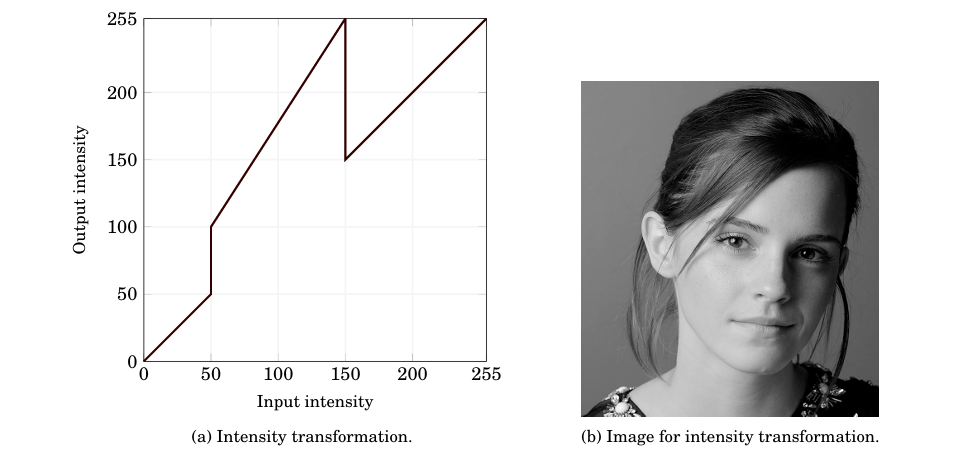

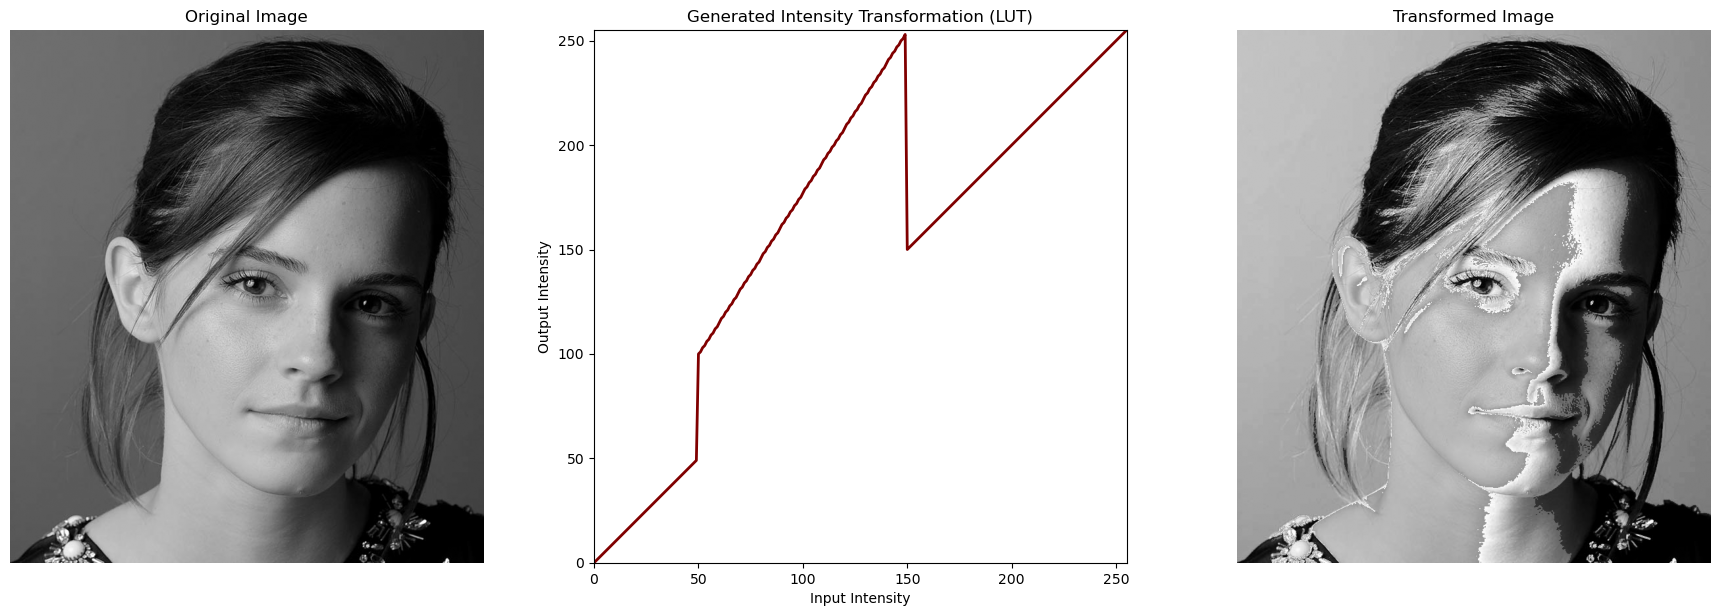

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img1 = cv2.imread('a1images/emma.jpg', cv2.IMREAD_GRAYSCALE) # Load the image in grayscale format.
if img1 is None:
    raise FileNotFoundError("Image not found. Make sure the image is in correct location.")

# Create a Lookup Table (LUT) to store the piecewise function
lut = np.zeros(256, dtype=np.uint8)

for r in range(256):
    if r < 50:
        s = r
    elif r < 150:
        s = 1.55 * r + 22.5
    else:
        s = r  # for r >= 150

    lut[r] = np.clip(s, 0, 255) # limit the s values between 0 and 255

transformed_img = cv2.LUT(img1, lut) # Applying LUT

# Displaying results
fig, axs = plt.subplots(1, 3, figsize=(18,6))

axs[0].imshow(img1, cmap='gray', vmin=0, vmax=255)
axs[0].set_title('Original Image')
axs[0].axis('off')

axs[1].plot(lut, color='maroon', linewidth=2)
axs[1].set_title('Generated Intensity Transformation (LUT)')
axs[1].set_xlabel('Input Intensity')
axs[1].set_ylabel('Output Intensity')
axs[1].set_xlim([0, 255])
axs[1].set_ylim([0, 255])
axs[1].set_aspect('equal') # make the plot square-shaped

axs[2].imshow(transformed_img, cmap='gray', vmin=0, vmax=255)
axs[2].set_title('Transformed Image')
axs[2].axis('off')

plt.tight_layout()
plt.show()
